In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Users\shubham.kumar\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shubham.kumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shubham.kumar\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubham.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading data
data_full = pd.read_csv("data.csv")
data_full.head(3)

,reviews.text,reviews.title,reviews.rating,final
0,product far not disappoint children love use l...,kindle,5.0,product far not disappoint children love use l...
1,great beginner experience person buy gift love,fast,5.0,great beginner experience person buy gift love...
2,inexpensive tablet use learn step nabi thrill ...,beginner tablet year old son,5.0,inexpensive tablet use learn step nabi thrill ...


In [3]:
# lemmatizer = WordNetLemmatizer()
# def LEMandSW(sent):
    
#     sent = sent.lower()
#     sent = re.sub(r"won't", "will not", sent)
#     sent = re.sub(r"can\'t", "can not", sent)
#     sent = re.sub(r"n\'t", " not", sent)
#     sent = re.sub(r"\'re", " are", sent)
#     sent = re.sub(r"\'s", " is", sent)
#     sent = re.sub(r"\'d", " would", sent)
#     sent = re.sub(r"\'ll", " will", sent)
#     sent = re.sub(r"\'t", " not", sent)
#     sent = re.sub(r"\'ve", " have", sent)
#     sent = re.sub(r"\'m", " am", sent)
  
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(sent)
#     return_sent = ""
  
#     for w in word_tokens:
#         if w not in stop_words:
#             return_sent += lemmatizer.lemmatize(w)+' ' 
#     return return_sent

In [4]:
data = data_full[["final","reviews.rating"]]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34621 entries, 0 to 34620
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   final           34621 non-null  object 
 1   reviews.rating  34621 non-null  float64
dtypes: float64(1), object(1)
memory usage: 811.4+ KB


## Preprocessing

In [5]:
# #STOPWORDS REMOVAL AND LEMMATIZATION
# data['reviews.text'] = data['reviews.text'].apply(LEMandSW)
# data['reviews.title'] = data['reviews.title'].apply(LEMandSW)

## EDA

In [6]:
data['reviews.rating'].value_counts()

5.0    23769
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

<AxesSubplot:>

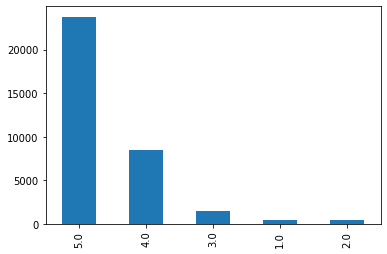

In [7]:
item_count = list(data['reviews.rating'].value_counts())
data['reviews.rating'].value_counts().plot.bar()

## Over-sampling

In [8]:
# #up-sampling
# df_5 = data[data['reviews.rating']==5.0]
# df_4 = data[data['reviews.rating']==4.0]
# df_3 = data[data['reviews.rating']==3.0]
# df_2 = data[data['reviews.rating']==2.0]
# df_1 = data[data['reviews.rating']==1.0]

# df_1 = df_1.sample(item_count[0],replace=True)
# df_2 = df_2.sample(item_count[0],replace=True)
# df_3 = df_3.sample(item_count[0],replace=True)
# df_4 = df_4.sample(item_count[0],replace=True)
# data = pd.concat([df_1,df_2,df_3,df_4,df_5],axis=0)
# data['reviews.rating'].value_counts().plot.bar()

In [9]:
X = data['final']
y = data['reviews.rating'].values.astype(int)

In [10]:
vec = TfidfVectorizer()
vec.fit(X)
X = vec.transform(X)


In [11]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X1, y1 = oversample.fit_resample(X, y)


C:\Users\shubham.kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

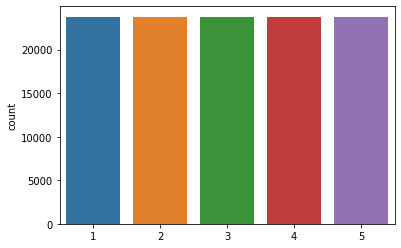

In [12]:
import seaborn as sns
sns.countplot(y1)

C:\Users\shubham.kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

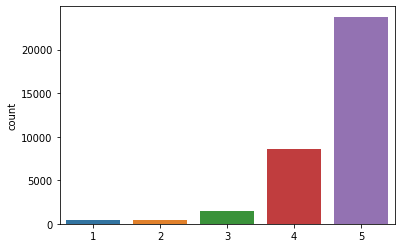

In [13]:
sns.countplot(y)

## Feature Extraction

In [14]:
# data['final'] = data['reviews.text']+data['reviews.title']

# vec = TfidfVectorizer()
# vec.fit(data['final'])
# X = vec.transform(data['final'])
# y = data['reviews.rating']

In [15]:
data.head()

,final,reviews.rating
0,product far not disappoint children love use l...,5.0
1,great beginner experience person buy gift love...,5.0
2,inexpensive tablet use learn step nabi thrill ...,5.0
3,fire hd two weeks love tablet great value prim...,4.0
4,buy grand daughter come visit set user enter a...,5.0


## Training data

In [16]:
# Let's split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train and Test Input shapes: ',X_train.shape,X_test.shape)


Train and Test Input shapes:  (24234, 26211) (10387, 26211)


C:\Users\shubham.kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

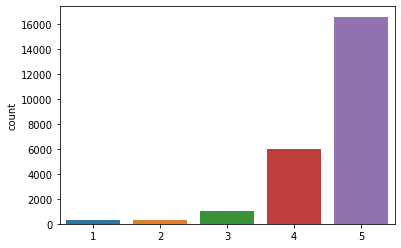

In [17]:
sns.countplot(y_train)

In [18]:
# Let's split the data into training and testing dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
print('Train and Test Input shapes: ',X_train1.shape,X_test1.shape)
print('Train and Test Target shapes: ',y_train1.shape,y_test1.shape)

Train and Test Input shapes:  (83191, 26211) (35654, 26211)
Train and Test Target shapes:  (83191,) (35654,)


C:\Users\shubham.kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubham.kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


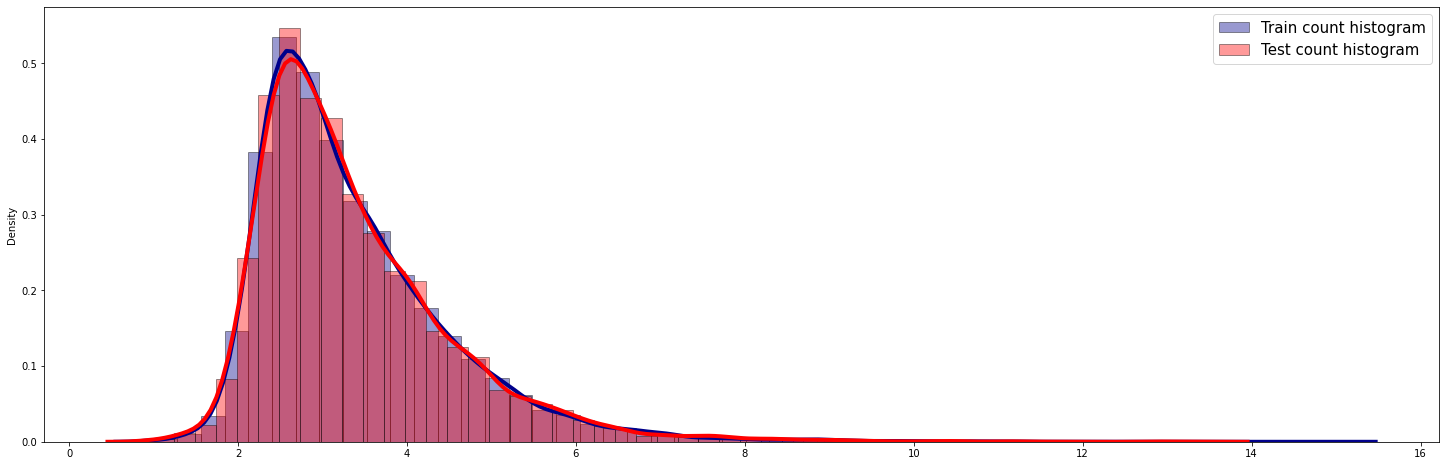

In [19]:
import seaborn as sns

plt.figure(figsize=(25,8))
sns.distplot(X_train.sum(axis=1).clip(0, 100), hist=True, kde=True, 
             bins=50, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="Train count histogram")
sns.distplot(X_test.sum(axis=1).clip(0, 100), hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="Test count histogram")
plt.legend(fontsize=15)
plt.show()

## Modelling

1.MultinomialNB Classification

In [20]:
from sklearn.metrics import accuracy_score


In [20]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
pred_1 = cross_validate(nb, X, y, cv=5)
pred_1 = np.mean(pred_1['test_score'])
print("The Accuracy is",round(pred_1*100,4),"%")

The Accuracy is 68.3285 %


In [21]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
pred_1 = cross_validate(nb, X1, y1, cv=5)
pred_1 = np.mean(pred_1['test_score'])
print("The Accuracy is",round(pred_1*100,4),"%")

The Accuracy is 76.9347 %


2.Ordinal Regression

In [22]:
from mord import OrdinalRidge
ordr = OrdinalRidge()
pred_2 = cross_validate(ordr, X, y, cv=5)
pred_2 = np.mean(pred_2['test_score'])
print("The Accuracy is",round(pred_2*100,4),"%")

The Accuracy is -49.2387 %


In [23]:
from mord import OrdinalRidge
ordr = OrdinalRidge()
pred_2 = cross_validate(ordr, X1, y1, cv=5)
pred_2 = np.mean(pred_2['test_score'])
print("The Accuracy is",round(pred_2*100,4),"%")

The Accuracy is -37.7408 %


In [24]:
from mord import LogisticIT
ordr1 = LogisticIT()
pred_8 = cross_validate(ordr1, X, y, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The Accuracy is",round(pred_8*100,4),"%")

The Accuracy is 70.804 %


In [25]:
from mord import LogisticIT
ordr1 = LogisticIT()
pred_8 = cross_validate(ordr1, X1, y1, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The Accuracy is",round(pred_8*100,4),"%")

The Accuracy is 53.2559 %


In [27]:
from mord import LogisticAT
ordr1 = LogisticAT()
pred_8 = cross_validate(ordr1, X, y, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The Accuracy is",round(pred_8*100,4),"%")

The Accuracy is -35.1981 %


In [28]:
from mord import LogisticAT
ordr1 = LogisticAT()
pred_8 = cross_validate(ordr1, X1, y1, cv=5)
pred_8 = np.mean(pred_8['test_score'])
print("The Accuracy is",round(pred_8*100,4),"%")

The Accuracy is -44.3797 %


In [ ]:
# #MulticlassLogistic

# from mord import MulticlassLogistic
# ordr1 = MulticlassLogistic()
# pred_8 = cross_validate(ordr1, X, y, cv=5)
# pred_8 = np.mean(pred_8['test_score'])
# print("The Accuracy is",round(pred_8*100,4),"%")

In [ ]:
# #MulticlassLogistic

# from mord import MulticlassLogistic
# ordr1 = MulticlassLogistic()
# pred_8 = cross_validate(ordr1, X1, y1, cv=5)
# pred_8 = np.mean(pred_8['test_score'])
# print("The Accuracy is",round(pred_8*100,4),"%")

3.Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
pred_3 = sv.predict(X_test)
print("The Accuracy score of SVM  is",round(accuracy_score(y_test, pred_3)*100,4),"%")
#print("MAE ", mean_absolute_error(y_test, pred_3))

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train1, y_train1)
pred_3 = sv.predict(X_test1)
print("The Accuracy score of SVM is",round(accuracy_score(y_test, pred_3)*100,4),"%")


4.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators=10)
pred_4 = cross_validate(rf, X, y, cv=5)
pred_4 = np.mean(pred_4['test_score'])
print("The Accuracy score of MultinomialNB Classification is",round(pred_4*100,4),"%")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators=10)
pred_4 = cross_validate(rf, X1, y1, cv=5)
pred_4 = np.mean(pred_4['test_score'])
print("The Accuracy score of MultinomialNB Classification is",round(pred_4*100,4),"%")

5.Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
pred_5 = cross_validate(lg, X, y, cv=5)
pred_5 = np.mean(pred_2['test_score'])
print("The Accuracy is",round(pred_5*100,4),"%")

## Evaluation

In [ ]:
vec = TfidfVectorizer(ngram_range=(1,3),max_features=25000)
vec.fit(data['final'])
X = vec.transform(data['final'])
y = data['reviews.rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Train and Test Input shapes: ',X_train.shape,X_test.shape)
print('Train and Test Target shapes: ',y_train.shape,y_test.shape)

In [ ]:
rfc2 = RandomForestClassifier()
params = {
    'n_estimators':[10,50,100],
    'max_depth':[5,20,40]
}

grid2 = GridSearchCV(rfc2, param_grid = params)
grid2.fit(X_train,y_train)

In [ ]:
model2 = grid2.best_estimator_
y_pred = model2.predict(X_test)
print('Accuracy =',round(accuracy_score(y_test,y_pred)*100,4),'%')

Ordinal regression
* GridsearchCV can't be applied here with this module. Reason is explained here :https://github.com/scikit-learn/scikit-learn/issues/3848 

In [23]:
import mord
alpha_ = [0.0001,0.001,0.01,0.1,1,10,100]
train_accuracy = []
test_accuracy = []
for a in alpha_:
    clf_m = mord.OrdinalRidge(alpha=a)
    clf_m.fit(X_train,y_train)
    y_pred = clf_m.predict(X_test)
    test_accuracy.append(round(accuracy_score(y_test,y_pred)*100,4))
    train_accuracy.append(round(accuracy_score(y_train,clf_m.predict(X_train))*100,4))



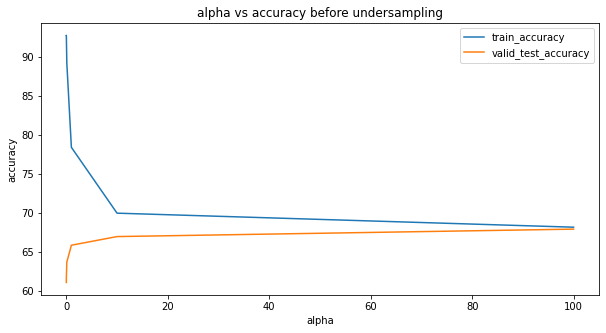

In [24]:
plt.figure(figsize = (10,5))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy before undersampling')
plt.plot(alpha_,train_accuracy,label='train_accuracy')
plt.plot(alpha_,test_accuracy,label = 'valid_test_accuracy')
plt.legend()

plt.show()

In [25]:
## after undersampling

In [28]:
import mord
alpha_ = [0.0001,0.001,0.01,0.1,1,10,100]
train_accuracy = []
test_accuracy = []
for a in alpha_:
    clf_m = mord.OrdinalRidge(alpha=a)
    clf_m.fit(X_train1,y_train1)
    y_pred = clf_m.predict(X_test1)
    test_accuracy.append(round(accuracy_score(y_test1,y_pred)*100,4))
    train_accuracy.append(round(accuracy_score(y_train1,clf_m.predict(X_train1))*100,4))



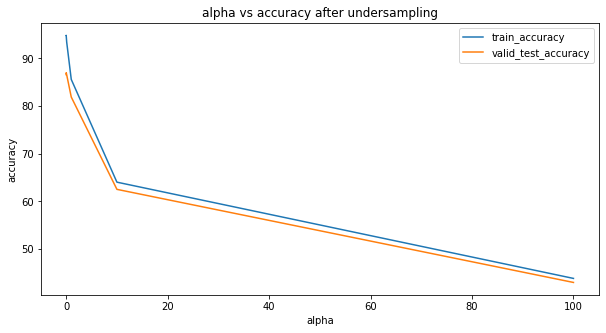

In [29]:
plt.figure(figsize = (10,5))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('alpha vs accuracy after undersampling')
plt.plot(alpha_,train_accuracy,label='train_accuracy')
plt.plot(alpha_,test_accuracy,label = 'valid_test_accuracy')
plt.legend()

plt.show()

In [46]:
clf_m = mord.OrdinalRidge(alpha=0.001)
clf_m.fit(X_train1,y_train1)
y_pred = clf_m.predict(X_test1)


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_train1,clf_m.predict(X_train1)))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00     16530
           2       0.99      1.00      1.00     16542
           3       0.97      0.97      0.97     16797
           4       0.85      0.92      0.88     16730
           5       0.93      0.86      0.89     16592

    accuracy                           0.95     83191
   macro avg       0.95      0.95      0.95     83191
weighted avg       0.95      0.95      0.95     83191



In [49]:
print(classification_report(y_test1,clf_m.predict(X_test1)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.99      0.99      7239
         2.0       0.98      1.00      0.99      7227
         3.0       0.90      0.96      0.93      6972
         4.0       0.66      0.83      0.74      7039
         5.0       0.83      0.55      0.66      7177

    accuracy                           0.87     35654
   macro avg       0.73      0.72      0.72     35654
weighted avg       0.87      0.87      0.86     35654



C:\Users\shubham.kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubham.kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubham.kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
valid_acc = []
k = [2,3,4,5,6,7,8,9,10]
for n in k:
    neigh = KNeighborsClassifier(n_neighbors=n)
    scores = cross_validate(neigh, X_train, y_train,cv=5, return_train_score=True,scoring = 'accuracy')
    print('K = ', n)
    train = np.mean(scores['train_score'])
    test = np.mean(scores['test_score'])
    print('Train Accuracy ' , train)
    print('Test Accuracy ' , test)
    train_acc.append(train)
    valid_acc.append(test)

K =  2
Train Accuracy  0.8242861127006756
Test Accuracy  0.5269867095312177
K =  3
Train Accuracy  0.7914912668503156
Test Accuracy  0.6384830114333947
K =  4
Train Accuracy  0.7664541388311388
Test Accuracy  0.6252372026861416
K =  5
Train Accuracy  0.754652558095646
Test Accuracy  0.6674919818420557
K =  6
Train Accuracy  0.7455950358155621
Test Accuracy  0.6579183519195428
K =  7
Train Accuracy  0.7377445009959637
Test Accuracy  0.6792934876132477
K =  8
Train Accuracy  0.7335768012291826
Test Accuracy  0.6738464960094194
K =  9
Train Accuracy  0.7283465364228542
Test Accuracy  0.6838325990326697
K =  10
Train Accuracy  0.7259944666308299
Test Accuracy  0.680655239771596


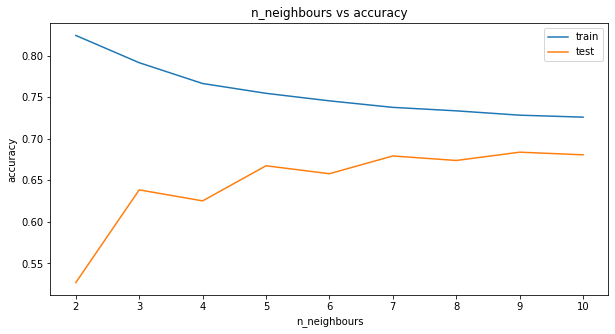

In [31]:
plt.figure(figsize = (10,5))
plt.xlabel('n_neighbours')
plt.ylabel('accuracy')
plt.title('n_neighbours vs accuracy')
plt.plot(k,train_acc,label='train')
plt.plot(k,valid_acc,label = 'test')
plt.legend()

plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
train_acc1 = []
valid_acc1 = []
k = [1,2,3,4,5,6,7,8,9]
for n in k:
    neigh = KNeighborsClassifier(n_neighbors=n)
    scores = cross_validate(neigh, X_train1, y_train1,cv=5, return_train_score=True,scoring = 'accuracy')
    print('K = ', n)
    train = np.mean(scores['train_score'])
    test = np.mean(scores['test_score'])
    print('Train Accuracy ' , train)
    print('Test Accuracy ' , test)
    train_acc1.append(train)
    valid_acc1.append(test)

K =  1
Train Accuracy  0.9999909845836376
Test Accuracy  0.8230938511192193
K =  2
Train Accuracy  0.825365726611113
Test Accuracy  0.7861787892098503
K =  3
Train Accuracy  0.8344562511086451
Test Accuracy  0.7921169285261642


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (10,5))
plt.xlabel('n_neighbours')
plt.ylabel('accuracy')
plt.title('n_neighbours vs accuracy')
plt.plot(k,train_acc1,label='train')
plt.plot(k,valid_acc1,label = 'test')
plt.legend()

plt.show()

In [ ]:
#selecting best alpha as 0.01 as lower alphas may tend to overfit the model
clf_m = mord.OrdinalRidge(alpha=0.01)
clf_m.fit(X_train,y_train)
y_pred = clf_m.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm(y_pred,y_test)